In [2]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
from scipy.stats import ttest_ind
from scipy.stats import linregress

In [20]:
final_datafile = "CSV files/final_output_ryan.csv"

final_data = pd.read_csv(final_datafile)

In [21]:
final_data2 = final_data[['Name','Inspection_Score','Inspection_Grade','Rating','Reviews','Price','Category']]
final_data2.head()


,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
0,El Tequilense Restaurant,94,A,4.0,42,$,Mexican
1,Seafood Express,91,A,4.0,266,$,Seafood
2,Pho Rowland Restaurant,93,A,4.0,408,$,Vietnamese
3,Jino's Pars,91,A,4.0,477,$$,Persian/Iranian
4,Pie-Not The Aussie Style Bakery,94,A,4.0,826,$,Bakeries


In [29]:
print(final_data2.mean()['Rating'])
print(final_data2.mean()['Reviews'])

3.7983417650365374
415.2442383361439


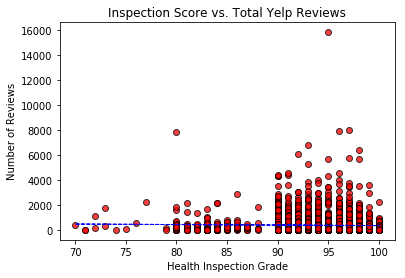

In [30]:
plt.scatter(final_data2['Inspection_Score'], final_data2['Reviews'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
(slope1, intercept1, _, _, _) = linregress(final_data2['Inspection_Score'], final_data2['Reviews'])
fit1 = slope1 * final_data2['Inspection_Score'] + intercept1
plt.plot(final_data2['Inspection_Score'], fit1, "b--", linewidth=1)
plt.xlabel("Health Inspection Grade")
plt.ylabel("Number of Reviews")
plt.title("Inspection Score vs. Total Yelp Reviews")
plt.savefig("Images/Health_Rating_vs_Yelp_Reviews.png")


In [11]:
final_data2.Inspection_Grade.value_counts()

A    3374
B     171
C      13
Name: Inspection_Grade, dtype: int64

In [12]:
final_data2[final_data2['Reviews']>6000]

,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
266,Porto's Bakery & Cafe,97,A,4.5,7968,$,Bakeries
462,Porto's Bakery & Cafe,92,A,4.5,6115,$,Bakeries
1081,Daikokuya Little Tokyo,80,B,4.0,7858,$$,Ramen
1115,Wurstküche,96,A,4.0,7913,$$,Hot Dogs
1227,Bottega Louie,95,A,4.0,15795,$$,Italian
1258,Perch,98,A,4.0,6372,$$$,Lounges
1529,Pink's Hot Dogs,93,A,3.5,6826,$,Hot Dogs


In [38]:
#final_data.groupby(['Category'])
grouped_final_data = final_data2.groupby(['Category'])
groupby_category_mean_reviewcount = grouped_final_data.mean()['Reviews']
groupby_category_mean_yelp = grouped_final_data.mean()['Rating'] 
groupby_category_mean_health = grouped_final_data.mean()['Inspection_Score'] 
final_groupby = pd.DataFrame({"Rating": groupby_category_mean_yelp, "Reviews": groupby_category_mean_reviewcount, 
                              "Inspection_Score": groupby_category_mean_health})


In [40]:
top15_reviews = final_groupby.sort_values(['Reviews'],ascending=False).head(15)
top15_reviews

,Rating,Reviews,Inspection_Score
Category,,,
Airports,2.500000,5751.000000,97.0
Shanghainese,4.000000,2922.000000,86.0
Tapas/Small Plates,4.250000,2360.000000,93.5
Art Museums,4.500000,2350.000000,98.0
Southern,3.750000,1833.000000,93.0
Hot Dogs,3.600000,1651.600000,94.9
Street Vendors,3.500000,1615.000000,96.0
Spanish,4.000000,1397.750000,94.0
Children's Museums,4.000000,1373.000000,99.0


In [41]:
top15_inspection = final_groupby.sort_values(['Inspection_Score'],ascending=False).head(80)
top15_inspection

,Rating,Reviews,Inspection_Score
Category,,,
"Beer, Wine & Spirits",5.000000,65.000000,100.000000
Home Decor,3.000000,756.000000,100.000000
Skating Rinks,3.500000,418.000000,100.000000
Acai Bowls,4.500000,111.000000,99.000000
Dog Parks,3.000000,119.000000,99.000000
Children's Museums,4.000000,1373.000000,99.000000
Pet Adoption,5.000000,61.000000,99.000000
Pretzels,3.000000,44.000000,99.000000
Outlet Stores,3.500000,1072.000000,99.000000


In [42]:
bottom15_inspection = final_groupby.sort_values(['Inspection_Score'],ascending=True).head(15)
bottom15_inspection

,Rating,Reviews,Inspection_Score
Category,,,
Floral Designers,3.000000,297.000000,80.000000
Creperies,3.750000,209.000000,85.000000
New Mexican Cuisine,4.000000,137.000000,85.000000
Food Stands,4.500000,305.000000,85.000000
Shanghainese,4.000000,2922.000000,86.000000
Dim Sum,3.500000,1067.750000,86.500000
Cantonese,3.500000,162.800000,88.200000
Hot Pot,4.250000,98.500000,88.500000
Buffets,3.071429,287.142857,88.857143


In [43]:
final_groupby["scaled_rating"] = ((final_groupby['Rating'] - final_groupby['Rating'].min()) / (final_groupby['Rating'].max() - final_groupby['Rating'].min())) *50
final_groupby.head()



,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Acai Bowls,4.5,111.0,99.0,43.75
Adult Entertainment,3.2,192.0,91.0,27.50
Airlines,3.0,87.0,93.0,25.00
Airport Lounges,4.0,121.0,92.0,37.50
Airport Terminals,2.5,107.5,97.5,18.75


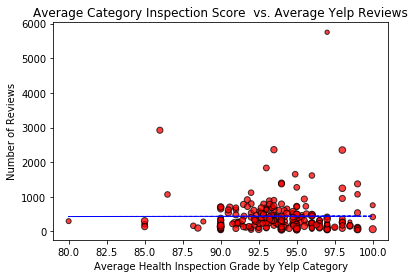

In [51]:
plt.scatter(final_groupby['Inspection_Score'], final_groupby['Reviews'], marker = "o", facecolors="red", edgecolors="black",
            s=final_groupby['scaled_rating'], alpha=0.75)
(slope2, intercept2, _, _, _) = linregress(final_groupby['Inspection_Score'],final_groupby['Reviews'])
fit2 = slope2 * final_groupby['Inspection_Score'] + intercept2
plt.plot(final_groupby['Inspection_Score'], fit2, "b--", linewidth=1)
plt.xlabel("Average Health Inspection Grade by Yelp Category")
plt.ylabel("Number of Reviews")
plt.title("Average Category Inspection Score  vs. Average Yelp Reviews")
plt.savefig("Images/Category_bubble.png")


In [50]:
final_groupby.sort_values(['Reviews'],ascending=False)

,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Airports,2.500000,5751.000000,97.000000,18.750000
Shanghainese,4.000000,2922.000000,86.000000,37.500000
Tapas/Small Plates,4.250000,2360.000000,93.500000,40.625000
Art Museums,4.500000,2350.000000,98.000000,43.750000
Southern,3.750000,1833.000000,93.000000,34.375000
Hot Dogs,3.600000,1651.600000,94.900000,32.500000
Street Vendors,3.500000,1615.000000,96.000000,31.250000
Spanish,4.000000,1397.750000,94.000000,37.500000
Children's Museums,4.000000,1373.000000,99.000000,37.500000


In [58]:

final_groupby

,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Acai Bowls,4.500000,111.000000,99.000000,43.750000
Adult Entertainment,3.200000,192.000000,91.000000,27.500000
Airlines,3.000000,87.000000,93.000000,25.000000
Airport Lounges,4.000000,121.000000,92.000000,37.500000
Airport Terminals,2.500000,107.500000,97.500000,18.750000
Airports,2.500000,5751.000000,97.000000,18.750000
American (New),3.817391,792.304348,92.826087,35.217391
American (Traditional),3.597403,348.649351,93.467532,32.467532
Amusement Parks,4.000000,952.000000,98.000000,37.500000


In [79]:
ethnic_foodgroups = ['Korean','Brazilian','Japanese',"American (New)","American (Traditional)",'Mexican',
                    'Peruvian','Italian','Chinese'] 

In [80]:
final_groupby.loc[ethnic_foodgroups]

,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Korean,3.986111,610.527778,92.180556,37.326389
Brazilian,4.000000,935.500000,95.500000,37.500000
Japanese,3.849593,461.642276,92.829268,35.619919
American (New),3.817391,792.304348,92.826087,35.217391
American (Traditional),3.597403,348.649351,93.467532,32.467532
Mexican,3.714092,318.176152,93.501355,33.926152
Peruvian,3.769231,347.461538,93.230769,34.615385
Italian,3.959770,693.022989,93.367816,36.997126
Chinese,3.600000,260.920000,90.886667,32.500000
